In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load mnist dataset
mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
#normalizing dataset
X_train, X_test = X_train/255.0, X_test/255.0

In [7]:
#reshaping to add channel dimension(28x28x1)
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)

In [10]:
#data_augmentation
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.1), #rotate by 10%
    keras.layers.RandomZoom(0.1) #zoom by 10%
])

In [12]:
#model(CNN)

model = keras.Sequential([
    data_augmentation,

    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(124, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax') # output layer
])

In [13]:
#compiling the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# training the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test),batch_size=64)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.8349 - loss: 0.5183 - val_accuracy: 0.9737 - val_loss: 0.0812
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9584 - loss: 0.1323 - val_accuracy: 0.9759 - val_loss: 0.0750
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9694 - loss: 0.1008 - val_accuracy: 0.9678 - val_loss: 0.1012
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9727 - loss: 0.0901 - val_accuracy: 0.9769 - val_loss: 0.0799
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9763 - loss: 0.0760 - val_accuracy: 0.9787 - val_loss: 0.0672
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9781 - loss: 0.0723 - val_accuracy: 0.9771 - val_loss: 0.0789
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9801 - loss: 0.0666 - val_accuracy: 0.9812 - val_loss: 0.0665
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9810 - loss: 0.0614 - 

In [17]:
# evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accurcay : {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0647
Test Accurcay : 0.9822


# Make Predictions

In [18]:
predictions = model.predict(X_test)

# convert probabilities to class labels
predicted_labels = np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# Visualizing correct and incoreect predictions

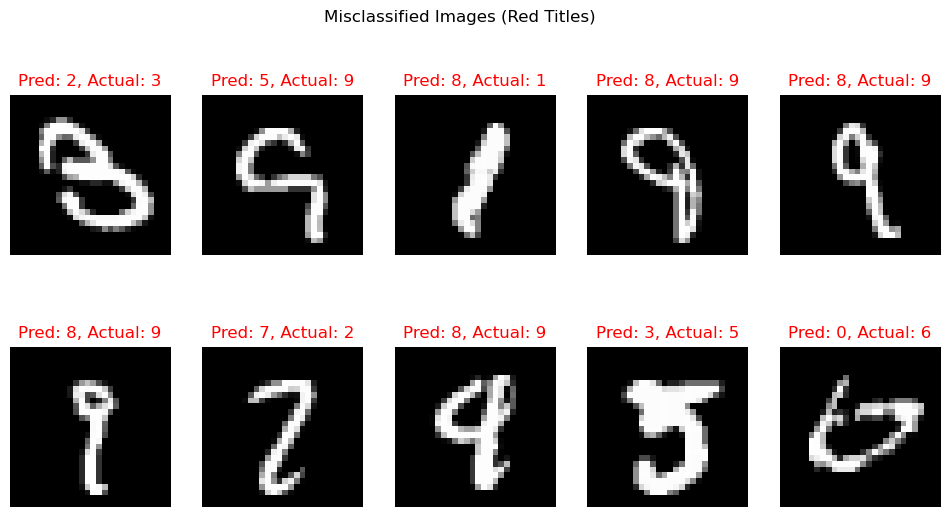

In [19]:
# Function to display correctly & incorrectly predicted images
def plot_predictions(X_test, y_test, predicted_labels, num_images=10):
    plt.figure(figsize=(12, 6))
    count = 0
    for i in range(len(X_test)):
        if count >= num_images:
            break
        actual, predicted = y_test[i], predicted_labels[i]
        
        # If incorrect prediction, highlight in red
        if actual != predicted:
            plt.subplot(2, 5, count + 1)
            plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
            plt.title(f"Pred: {predicted}, Actual: {actual}", color="red")
            plt.axis("off")
            count += 1

    plt.suptitle("Misclassified Images (Red Titles)")
    plt.show()

# Show misclassified images
plot_predictions(X_test, y_test, predicted_labels)


# Display Class-wise Accuracy

In [20]:
from sklearn.metrics import classification_report

# Print classificaction report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.97      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.94      1.00      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Confusion matrix for error analysis
helps to understand:
✅ Which numbers are confused with each other? (e.g., 5 vs. 8)

✅ Where does the model struggle?
✅ How well it performs per class

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

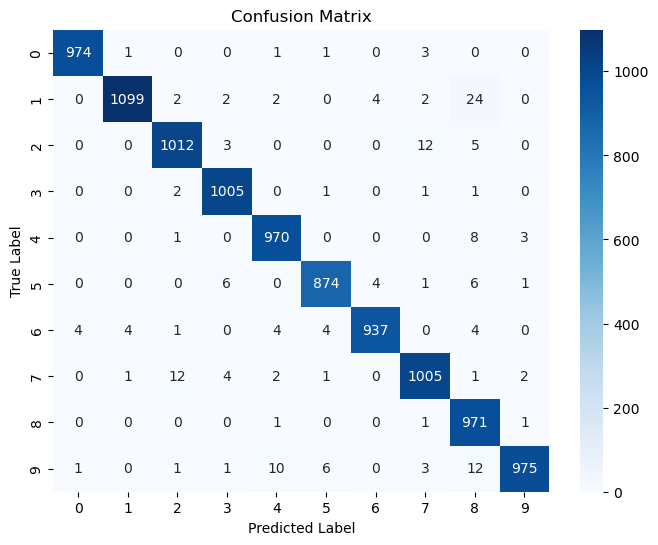

In [22]:
cm = confusion_matrix(y_test, predicted_labels)

#plotting cm
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
model.save('mnist_cnn.keras')